# TensorFlow - Pipeline Review

In [1]:
# importing packages
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/msonjap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Get data

In [2]:
# reading data
yelp_ratings = pd.read_csv("./data/yelp_ratings.csv") 
yelp_reviews = yelp_ratings["text"].values
yelp_reviews_labels = yelp_ratings["sentiment"].values
yelp_reviews_stars = yelp_ratings["stars"].values

## Custom preprocess data

In [3]:
# processing data
stpwrds = stopwords.words('english') + list(string.punctuation)

processed_text = []
for sentence in yelp_reviews:
    low_tokens = word_tokenize(sentence.lower())
    processed_text.append([word for word in low_tokens if word
                        not in stpwrds])

## Hyperparameters

In [4]:
# creating a list of hyperparameters for tuning the model
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = "post"
padding_type = "post"
oov_token = "<oov>"
training_size = 20000

## Train/Test split

In [5]:
# splitting test and train data sets
training_sentences = processed_text[0:training_size]
testing_sentences = processed_text[training_size:]
training_labels = yelp_reviews_labels[0:training_size]
testing_labels = yelp_reviews_labels[training_size:]

## Sequence and padding

In [6]:
# defining tokenizer and paddin sentences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

In [7]:
# checking padded sentences shape
training_padded.shape

(20000, 32)

## Create the Model (Neural Network)

In [8]:
# creating model
model = keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# compiling model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the model

In [10]:
# training model
history = model.fit(training_padded, training_labels, validation_data=(testing_padded, testing_labels), epochs=5) 

Train on 20000 samples, validate on 24530 samples
Epoch 1/5
20000/20000 [==============================] - 2s 92us/sample - loss: 0.3404 - accuracy: 0.8515 - val_loss: 0.2428 - val_accuracy: 0.9010
Epoch 2/5
20000/20000 [==============================] - 2s 76us/sample - loss: 0.1776 - accuracy: 0.9326 - val_loss: 0.2461 - val_accuracy: 0.8993
Epoch 3/5
20000/20000 [==============================] - 2s 76us/sample - loss: 0.1321 - accuracy: 0.9517 - val_loss: 0.2770 - val_accuracy: 0.8940
Epoch 4/5
20000/20000 [==============================] - 2s 76us/sample - loss: 0.0986 - accuracy: 0.9675 - val_loss: 0.3278 - val_accuracy: 0.8891
Epoch 5/5
20000/20000 [==============================] - 2s 76us/sample - loss: 0.0776 - accuracy: 0.9741 - val_loss: 0.3767 - val_accuracy: 0.8829


## Learning curve

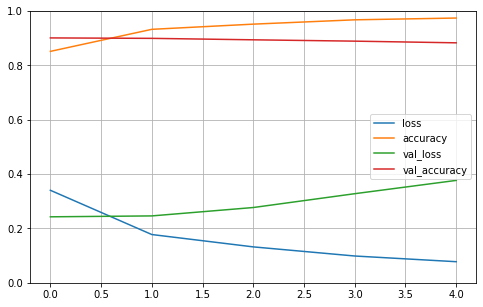

In [11]:
# plotting learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

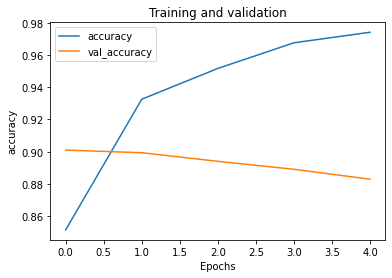

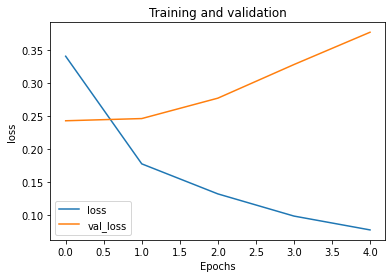

In [12]:
# defining function to plot acuracy and loss
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+ string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")